# Práctica Individual Datalab Biomedicina

## Ejercicio 3: 

#### Identificar los genes que muestran expresión diferencial en células de cáncer de pulmón al inactivar el gen ARID2. 
#### Para ello se han realizado 4 réplicas biológicas de las células modificadas (ARID2_1:4) y 4 réplicas biológicas de células control. 
#### Se aportan los datos de las secuencias alineadas en formato BAM.

# Desarrollo

En esta práctica, queremos saber qué efecto tiene la inactivación del gen ARID2 en celulas de cancer de pulmón.

En particular, queremos saber como esto afecta la producción de determinadas proteinas. Para eso, vamos a recolectar los fragmentos de RNA producidos por celulas del cáncer y por celulas de control.

Sucesivamente, a través de la reacción de la transcriptasa reversa, los fragmentos se replican en sus correspondientes fragmentos de DNA (cDNA), para que se pueda identificar a qué gen corresponden (haciendo una comparación con un genoma de referencia) y se contan.

El efecto de la inactivación del gen ARID2 se refleja en diferencias estadisticamente significativas en la producción de fragmentos de RNA correspondientes a unos cuantos genes entre células del tumor, que han sufrido una mutación del gen ARID2, y células de control, que es lo que queremos descubrir. 

## 1. Generación de lecturas crudas

Al tener ya ficheros de secuencias de DNA en formato binario (.bam), nuestro primer paso consiste en contar cuantos de los fragmentos que hemos producido corresponden a un determinado gen.

Para eso, hacemos una comparación con un genoma de referencia, que usamos para identificar a qué gen corresponde cada uno de los fragmentos de cDNA.

La comparación se hace tanto para células del tumor cuyo gen ARID2 ha sido inactivado, como para células de control procedentes de tejido sano.

Como hemos visto, la principal fuente de incertidumbre en las medidas de expresión diferencial es la varibilidad en la tasa de trancripción de cDNA a partir de RNA en la reacción de la transcriptasa reversa. Para ser menos sensibles a este efecto, usamos cuatro distintas muestras por cada tipo de celulas, de manera que la tasa de transcripción global que observamos sea un promedio de las tasas individuales y sea más uniforme.

Para ejecutar este paso, usamos el paquete HTSeq, a través del siguiente comando:

    python -m HTSeq.scripts.count -s no -f bam Archivo.bam Genes.gtf > Archivo.counts

In [9]:
# Uso esta sintaxis porque con "!" no me funciona

# Primer archivo de celulas tumorales
system("python -m HTSeq.scripts.count -s no -f bam ARID2_1.filtered.bam Reduced_genes.gtf > ARID2_1.counts", 
       intern=TRUE)

character(0)

In [11]:
# Segundo archivo de celulas tumorales
system("python -m HTSeq.scripts.count -s no -f bam ARID2_2.filtered.bam Reduced_genes.gtf > ARID2_2.counts", 
       intern=TRUE)

character(0)

In [12]:
# Tercer archivo de celulas tumorales
system("python -m HTSeq.scripts.count -s no -f bam ARID2_3.filtered.bam Reduced_genes.gtf > ARID2_3.counts", 
       intern=TRUE)

character(0)

In [13]:
# Cuarto archivo de celulas tumorales
system("python -m HTSeq.scripts.count -s no -f bam ARID2_4.filtered.bam Reduced_genes.gtf > ARID2_4.counts", 
       intern=TRUE)

character(0)

In [14]:
# Primer archivo de celulas de tejido sano de control
system("python -m HTSeq.scripts.count -s no -f bam Control_1.filtered.bam Reduced_genes.gtf > Control_1.counts", 
       intern=TRUE)

character(0)

In [15]:
# Segundo archivo de celulas de tejido sano de control
system("python -m HTSeq.scripts.count -s no -f bam Control_2.filtered.bam Reduced_genes.gtf > Control_2.counts", 
       intern=TRUE)

character(0)

In [16]:
# Tercer archivo de celulas de tejido sano de control
system("python -m HTSeq.scripts.count -s no -f bam Control_3.filtered.bam Reduced_genes.gtf > Control_3.counts", 
       intern=TRUE)

character(0)

In [17]:
# Cuarto archivo de celulas de tejido sano de control
system("python -m HTSeq.scripts.count -s no -f bam Control_4.filtered.bam Reduced_genes.gtf > Control_4.counts", 
       intern=TRUE)

character(0)

In [18]:
# Verifico si está todo
system("ls -lrt", intern=TRUE)

[1] "total 1229736"                                                                               
 [2] "-rw-r--r-- 1 nicolo nicolo 154085877 may  2 14:02 ARID2_1.filtered.bam"                      
 [3] "-rw-r--r-- 1 nicolo nicolo 178178603 may  2 14:02 ARID2_2.filtered.bam"                      
 [4] "-rw-r--r-- 1 nicolo nicolo 214363664 may  2 14:02 ARID2_3.filtered.bam"                      
 [5] "-rw-r--r-- 1 nicolo nicolo 100095632 may  2 14:02 ARID2_4.filtered.bam"                      
 [6] "-rw-r--r-- 1 nicolo nicolo 173103372 may  2 14:02 Control_1.filtered.bam"                    
 [7] "-rw-r--r-- 1 nicolo nicolo 144441229 may  2 14:02 Control_2.filtered.bam"                    
 [8] "-rw-r--r-- 1 nicolo nicolo 141895492 may  2 14:02 Control_3.filtered.bam"                    
 [9] "-rw-r--r-- 1 nicolo nicolo 145382659 may  2 14:02 Control_4.filtered.bam"                    
[10] "-rw-r--r-- 1 nicolo nicolo      7105 may  2 14:02 Reduced_gene_id.txt"                       
[11] "-rw-r--r-- 1 nicolo nicolo   7312004 may  2 14:02 Reduced_genes.gtf"                         
[12] "-rw-r--r-- 1 nicolo nicolo         0 may  2 16:04 Archivo.counts"                            
[13] "-rw-r--r-- 1 nicolo nicolo      6139 may  2 16:09 ARID2_1.counts"                            
[14] "-rw-r--r-- 1 nicolo nicolo      6159 may  2 16:13 ARID2_2.counts"                            
[15] "-rw-r--r-- 1 nicolo nicolo      6182 may  2 16:18 ARID2_3.counts"                            
[16] "-rw-r--r-- 1 nicolo nicolo      6047 may  2 16:20 ARID2_4.counts"                            
[17] "-rw-r--r-- 1 nicolo nicolo      6190 may  2 16:24 Control_1.counts"                          
[18] "-rw-r--r-- 1 nicolo nicolo      6156 may  2 16:27 Control_2.counts"                          
[19] "-rw-r--r-- 1 nicolo nicolo      6156 may  2 16:30 Control_3.counts"                          
[20] "-rw-r--r-- 1 nicolo nicolo      6766 may  2 16:31 Practica_Individual_Nicolo_Trevisani.ipynb"
[21] "-rw-r--r-- 1 nicolo nicolo      1543 may  2 16:31 Practica_Individual_Nicolo_Trevisani.r"    
[22] "-rw-r--r-- 1 nicolo nicolo    282727 may  2 16:31 Practica_Individual_Nicolo_Trevisani.html" 
[23] "-rw-r--r-- 1 nicolo nicolo      6110 may  2 16:32 Control_4.counts"

## 2. Generación de tabla de expresión

Ahora que sabemos qué gen corresponde cada fragmento de cDNA que hemos secuenciado, vamos a ordenar los datos en un data frame, para que sea más sencillo analizarlos.

Vamos a preparar una tabla de expresión, donde:
- cada columna representa una de las muestras;
- cada linea representa un gen;
- cada celda representa el número copias de un gen especifico que se han contado en la muestra correspondiente.

In [20]:
# Preparo una variable con los nombres de los ficheros .counts que hemos preparado en el paso anterior
samples<- c(paste0("ARID2_",1:4),paste0("Control_",1:4))
samples

[1] "ARID2_1"   "ARID2_2"   "ARID2_3"   "ARID2_4"   "Control_1" "Control_2"
[7] "Control_3" "Control_4"

In [22]:
# Preparo la primera columna de la tabla, con los números de la primera muestra
# y los indices, que representan los genes
first_sample <- read.delim(paste0(samples[1],".counts"),header=F,row.names=1)
head(first_sample)

,V2
,<int>
ENSG00000005884,58137
ENSG00000007237,71
ENSG00000012124,408
ENSG00000015413,23
ENSG00000023839,31709
ENSG00000044459,3543


In [25]:
# Transformo la columna en un data frame
dataframe <- data.frame(first_sample)

# Añado las demás columnas
for (s in samples[2:length(samples)]){ 
    file <- paste0(s,".counts")
    column <- read.delim(file,header=F,row.names=1)
    dataframe <- cbind(dataframe,s=column) 
}

# Cambio los nombre de las columnas del data frame usando la variable 'samples' que he creado antes    
colnames(dataframe) <- samples

head(dataframe)

,ARID2_1,ARID2_2,ARID2_3,ARID2_4,Control_1,Control_2,Control_3,Control_4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000005884,58137,68097,80771,21907,63319,51881,50270,33641
ENSG00000007237,71,108,145,38,158,112,98,57
ENSG00000012124,408,522,558,222,189,203,232,435
ENSG00000015413,23,34,42,12,36,28,21,28
ENSG00000023839,31709,45375,59169,21676,51163,39691,39409,34892
ENSG00000044459,3543,4280,5049,1271,3949,3046,3159,1256


## 3. Generación de una matriz con las condiciones

Este paso es necesario para crear un objeto de tipo DESeq2.

In [29]:
grp <- c(rep("ARID2",4),rep("Control",4))

cData <- data.frame(sample_Type=as.factor(grp))

rownames(cData) <- colnames(dataframe)

grp
cData

[1] "ARID2"   "ARID2"   "ARID2"   "ARID2"   "Control" "Control" "Control"
[8] "Control"

,sample_Type
,<fct>
ARID2_1,ARID2
ARID2_2,ARID2
ARID2_3,ARID2
ARID2_4,ARID2
Control_1,Control
Control_2,Control
Control_3,Control
Control_4,Control


## 4. Creación del objeto de DESeq2

Ahora queremos saber cuales de los genes se han visto afectados por la inactivación del gen ARID2.

Para eso, usamos la librería DESeq2, que hace una comparación estadistica de las muestras *ARID2* con las muestras *Control* y verifica para qué genes hay diferencias significativas.

In [40]:
library("DESeq2")

In [41]:
d.deseq <- DESeqDataSetFromMatrix(countData=dataframe,colData=cData,design=~sample_Type)
d.deseq

  it appears that the last variable in the design formula, 'sample_Type',
  has a factor level, 'Control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').



class: DESeqDataSet 
dim: 306 8 
metadata(1): version
assays(1): counts
rownames(306): ENSG00000005884 ENSG00000007237 ... __not_aligned
  __alignment_not_unique
rowData names(0):
colnames(8): ARID2_1 ARID2_2 ... Control_3 Control_4
colData names(1): sample_Type

Como sale un aviso de que tenemos que indicar cual es el nivel de referencia frente al que comparar, utilizamos la función relevel()

In [42]:
d.deseq$sample_Type <-relevel(d.deseq$sample_Type, ref="Control")

Ahora le decidmos que calcule la expresión diferencial

In [43]:
ARID2_DESeq <- DESeq(d.deseq)
ARID2_DESeq

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



class: DESeqDataSet 
dim: 306 8 
metadata(1): version
assays(4): counts mu H cooks
rownames(306): ENSG00000005884 ENSG00000007237 ... __not_aligned
  __alignment_not_unique
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(8): ARID2_1 ARID2_2 ... Control_3 Control_4
colData names(2): sample_Type sizeFactor

Finalmente, generamos los resultados de la comparación.

In [44]:
res <- results(ARID1A_DESeq)
res

log2 fold change (MLE): sample Type Control vs ARID2 
Wald test p-value: sample Type Control vs ARID2 
DataFrame with 306 rows and 6 columns
                               baseMean      log2FoldChange              lfcSE
                              <numeric>           <numeric>          <numeric>
ENSG00000005884        49895.6710282927  -0.225151044508738 0.0816289927181222
ENSG00000007237        90.0138757327097   0.174324247138879  0.196675945403852
ENSG00000012124        351.610628134537  -0.584727587468222  0.441249870395526
ENSG00000015413        26.6710351978954  0.0142883161501132  0.302555045250692
ENSG00000023839        38928.2712366822 0.00932411243548802  0.166981770068066
...                                 ...                 ...                ...
__no_feature           95448.6396444429  -0.138531711561081  0.124262044430074
__ambiguous                           0                  NA                 NA
__too_low_aQual                       0                  NA          

## 5. Representación de los resultados

Representamos ahora los resultados graficamente, para que sea más facil la interpretación.

El grafico que vamos a producir presenta:
- en el eje x el número de fragmentos de cDNA asociados a un dado gen;
- en el eje y cuanto los números de fragmento de cDNA en células del cáncer son estadisticamente incompatibles con los de células de tejido sano.
- en rojo, los genes que han visto afectada su expresión debido a la mutación, en negro los que presentan una frecuencia de expresión compatible en células con o sin mutación.

Es interesante observar que para genes poco representados, tanto en las muestras de control como en las muestras objetivo, es más difícil decir si los cambios en la frecuencia de expresión se pueden atribuir a las mutaciones.
De alguna manera, ahí los resultados siguen siendo afectados por la varibilidad en el número de copias de cDNA producidas por cada fragmento de RNA.

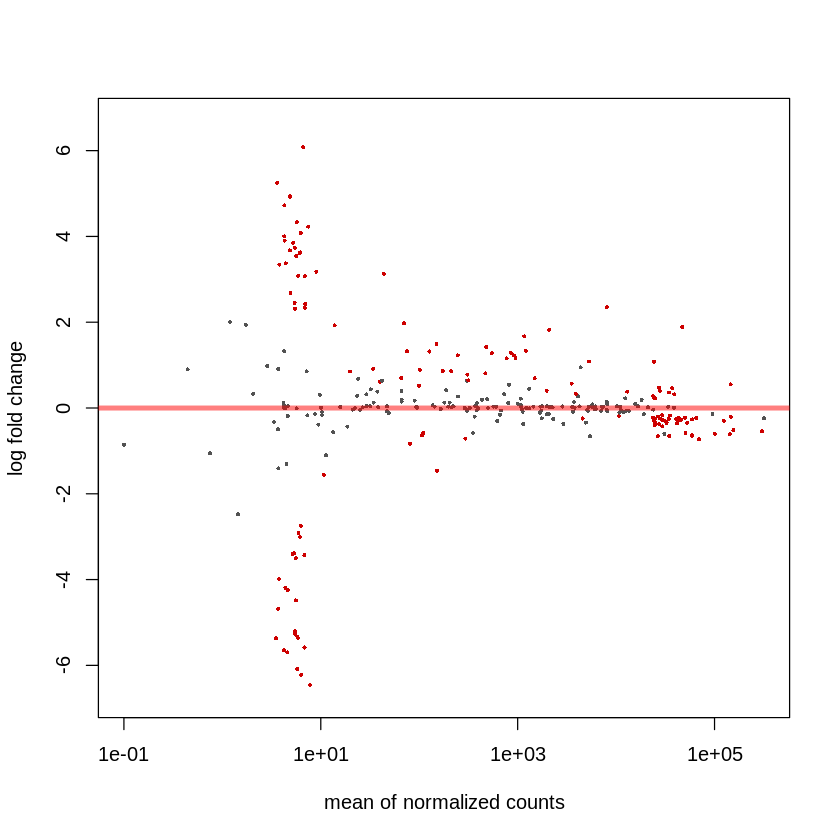

In [45]:
plotMA(res)

## 6. Impresión de los resultados en un archivo de texto

Imprimimos el resultado de los tests estadísticos en un archivo de texto

In [48]:
write.table(res,"ARID2_results.txt",sep="\t", col.names=NA)

También resulta útil muchas veces generar una tabla de expresión normalizada entre las muestras.

In [49]:
Norm_ARID2 <- estimateSizeFactors(ARID2_DESeq)

c <- counts(Norm_ARID2,normalized=TRUE)

write.table(c,"ARID2_expresion_normalizada.txt",sep="\t",col.names=NA)